# **Preparación y Analisis de Data Set**

---



In [ ]:
import numpy as np
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib
from matplotlib import ticker
import seaborn as sns



import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving heart.csv to heart.csv


1. age - Edad en años

2. sex - Sexo (1 = masculino; 0 = femenino)

3. cp - Tipo de dolor en el pecho (1 = angina típica; 2 = angina atípica; 3 = dolor no anginoso; 0 = asintomático)

4. trtbps - Presión arterial en reposo (en mm Hg al ingreso al hospital)

5. chol - Colesterol en mg/dl

6. fbs - Azúcar en sangre en ayunas > 120 mg/dl (1 = verdadero; 0 = falso)

7. restecg - Resultados electrocardiográficos en reposo (1 = normal; 2 = con onda STT-T anormal; 0 = hipertrofia)

8. thalach - Frecuencia cardíaca máxima alcanzada

9. exang - Angina inducida por el ejercicio (1 = si; 0 = no)

10. oldpeak - Depresión del ST inducida por el ejercicio en relación con el reposo

11. slope - the slope of the peak exercise ST segment (2 = pendiente ascendente; 1 = plano; 0 = pendiente descendente)

12. ca - Número de vasos principales (0-3) coloreados por fluoroscopia

13. thal - 2 = normal; 1 = defecto fijo; 3 = defecto reversible

14. output - atributo predicho - Diagnóstico de enfermedad cardíaca (estado de enfermedad angiográfico)  (Value 0 = < estrechamiento del diámetro; Value 1 = > 50% estrechamiento del diámetro)


In [ ]:
# Método type:
type(uploaded)

dict

In [ ]:
# Levantamos el csv en formato DF:
df = pd.read_csv(io.BytesIO(uploaded['heart.csv']),sep=",")
df.head(20)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
# Separando las columnas en categoricas y continuas
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exng','slp', 'caa', 'thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("Las columnas categoricas son : ", cat_cols)
print("Las columnas continuas son  : ", con_cols)
print("La variable objetivo es :  ", target_col)

Las columnas categoricas son :  ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
Las columnas continuas son  :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
La variable objetivo es :   ['output']


In [ ]:
# Tamaño data set:
df.shape
print('El df tiene {} instancias y {} variables'.format(df.shape[0],df.shape[1]))

El df tiene 303 instancias y 14 variables


In [ ]:
# Tipo de variables:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [ ]:
# Vemos si hay datos faltantes:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

**Observación:**
 No hay valores perdidos.

In [ ]:
# Resumen descriptivo:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Observación:**

* La edad del grupo varía de 29 a 77 años y la edad promedio es de 54 años.
* La presión arterial promedio de un individuo es 131 mientras que el valor máximo llega hasta 200.
* La frecuencia cardíaca máxima media del grupo es de 150, mientras que en general oscila entre 71 y 202

In [ ]:
#comprobamos valores unicos
list_col=['sex','chol','trtbps','cp','thall','exng']

for col in list_col:
    print('{} :{} ' . format(col.upper(),df[col].unique()))

SEX :[1 0] 
CHOL :[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131] 
TRTBPS :[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164] 
CP :[3 2 1 0] 
THALL :[1 2 3 0] 
EXNG :[0 1] 


**Observación:**



* Hay dos sexos: 0 y 1
* El  nivel de colesterol mas alto es de 564 y el mas bajo es 126
* La presion arterial en reposo de las personas varia entre 94 y 200
* Hay 4 tipos de dolor de pecho
* La angina inducida por ejercicio tiene 2 tipos (1 = si, 0 = no)




In [ ]:
desviacion_estandar = np.std(df['age'])
print(f"La desviación estándar de la edad es: {desviacion_estandar}")

La desviación estándar de la edad es: 9.067101638577872


**Observación:**

En este caso, con una desviación estándar de la edad de 9.07 inferimos que hay una variabilidad relativamente baja en las edades dentro del conjunto de datos. La mayoría de las edades en el conjunto de datos están cerca de la media, lo que indica que las edades de las personas están relativamente agrupadas en torno a un valor promedio.

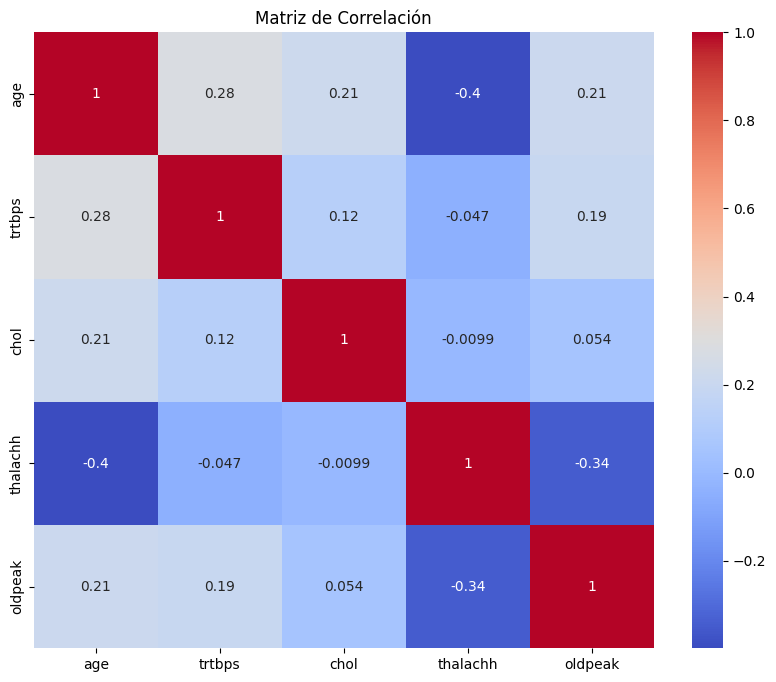

La matriz de correlación muestra las relaciones entre las variables:

La correlación entre 'age' y 'trtbps' es 0.28.
La correlación entre 'age' y 'chol' es 0.21.
La correlación entre 'age' y 'thalachh' es -0.40.
La correlación entre 'age' y 'oldpeak' es 0.21.
La correlación entre 'trtbps' y 'age' es 0.28.
La correlación entre 'trtbps' y 'chol' es 0.12.
La correlación entre 'trtbps' y 'thalachh' es -0.05.
La correlación entre 'trtbps' y 'oldpeak' es 0.19.
La correlación entre 'chol' y 'age' es 0.21.
La correlación entre 'chol' y 'trtbps' es 0.12.
La correlación entre 'chol' y 'thalachh' es -0.01.
La correlación entre 'chol' y 'oldpeak' es 0.05.
La correlación entre 'thalachh' y 'age' es -0.40.
La correlación entre 'thalachh' y 'trtbps' es -0.05.
La correlación entre 'thalachh' y 'chol' es -0.01.
La correlación entre 'thalachh' y 'oldpeak' es -0.34.
La correlación entre 'oldpeak' y 'age' es 0.21.
La correlación entre 'oldpeak' y 'trtbps' es 0.19.
La correlación entre 'oldpeak' y 'chol' e

In [ ]:

# Seleccionar columnas de interés
cols = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
data_subset = df[cols]

# Cálculo de la matriz de correlación
correlation_matrix = data_subset.corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

# Conclusión
conclusion = "La matriz de correlación muestra las relaciones entre las variables:\n"
for col1 in cols:
    for col2 in cols:
        if col1 != col2:
            correlation = correlation_matrix.loc[col1, col2]
            conclusion += f"\nLa correlación entre '{col1}' y '{col2}' es {correlation:.2f}."

print(conclusion)


In [ ]:
conteo_genero = df['sex'].value_counts()

# Obtener el número de hombres y mujeres
num_hombres = conteo_genero[1]
num_mujeres = conteo_genero[0]

print("Cantidad de hombres:", num_hombres)
print("Cantidad de mujeres:", num_mujeres)

Cantidad de hombres: 207
Cantidad de mujeres: 96


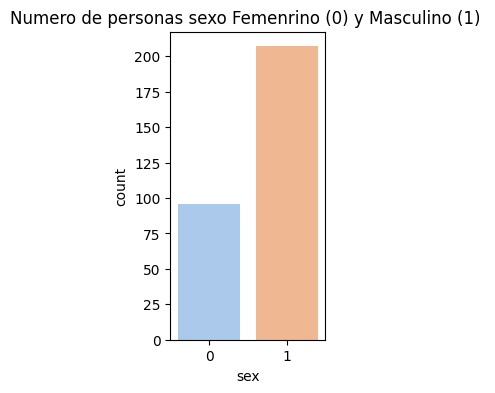

In [ ]:
# graficamos sex
plt.figure(figsize=(2,4))
ax=plt.axes()
plt.title('Numero de personas sexo Femenrino (0) y Masculino (1) ')
p = sns.countplot(data=df, x="sex", palette='pastel')


**Observación:**

* El número de personas de sexo Femenino (0) son 96 mientras que el Masculino (1) son 207.


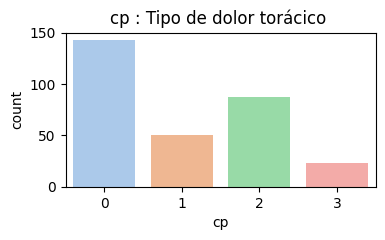

In [ ]:
# graficamos "cp"
plt.figure(figsize=(4,2))
ax=plt.axes()
plt.title('cp : Tipo de dolor torácico ')
p = sns.countplot(data=df, x="cp", palette='pastel')

**Observación:**
* Valor 0: angina típica
* Valor 1: angina atípica
* Valor 2: dolor no anginoso
* Valor 3: asintomático

Las personas de la categoría de dolor torácico 0 tienen el recuento más alto, mientras que el recuento de dolor torácico 3 es el más bajo

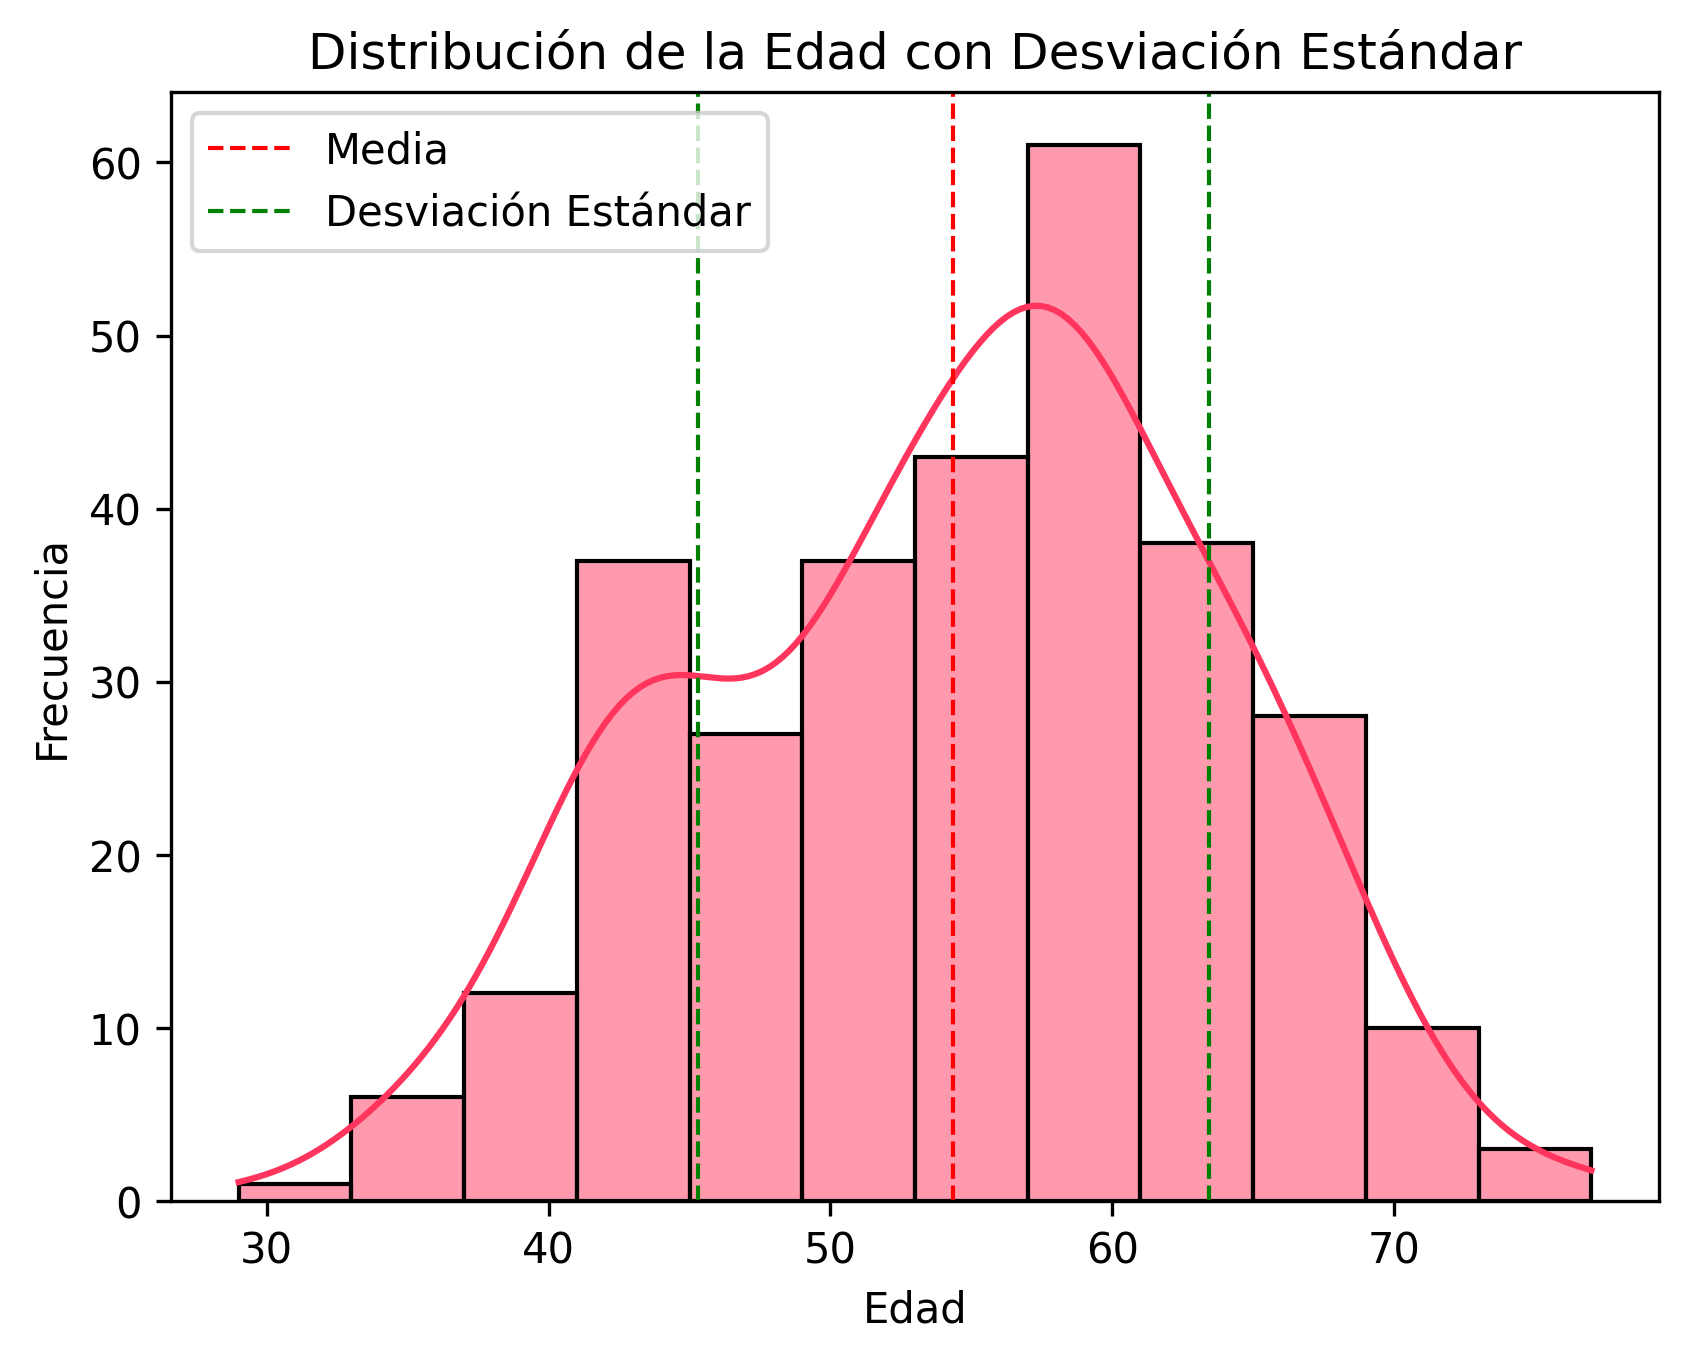

In [ ]:
# Crear el gráfico de distribución de la edad
sns.histplot(df['age'], kde=True)

# Calcular la media y la desviación estándar de la edad
media = df['age'].mean()
desviacion_estandar = df['age'].std()

# Graficar la línea vertical para la media y la desviación estándar
plt.axvline(media, color='red', linestyle='dashed', linewidth=1, label='Media')
plt.axvline(media + desviacion_estandar, color='green', linestyle='dashed', linewidth=1, label='Desviación Estándar')
plt.axvline(media - desviacion_estandar, color='green', linestyle='dashed', linewidth=1)

# Personalizar los ejes y el título
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Edad con Desviación Estándar')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

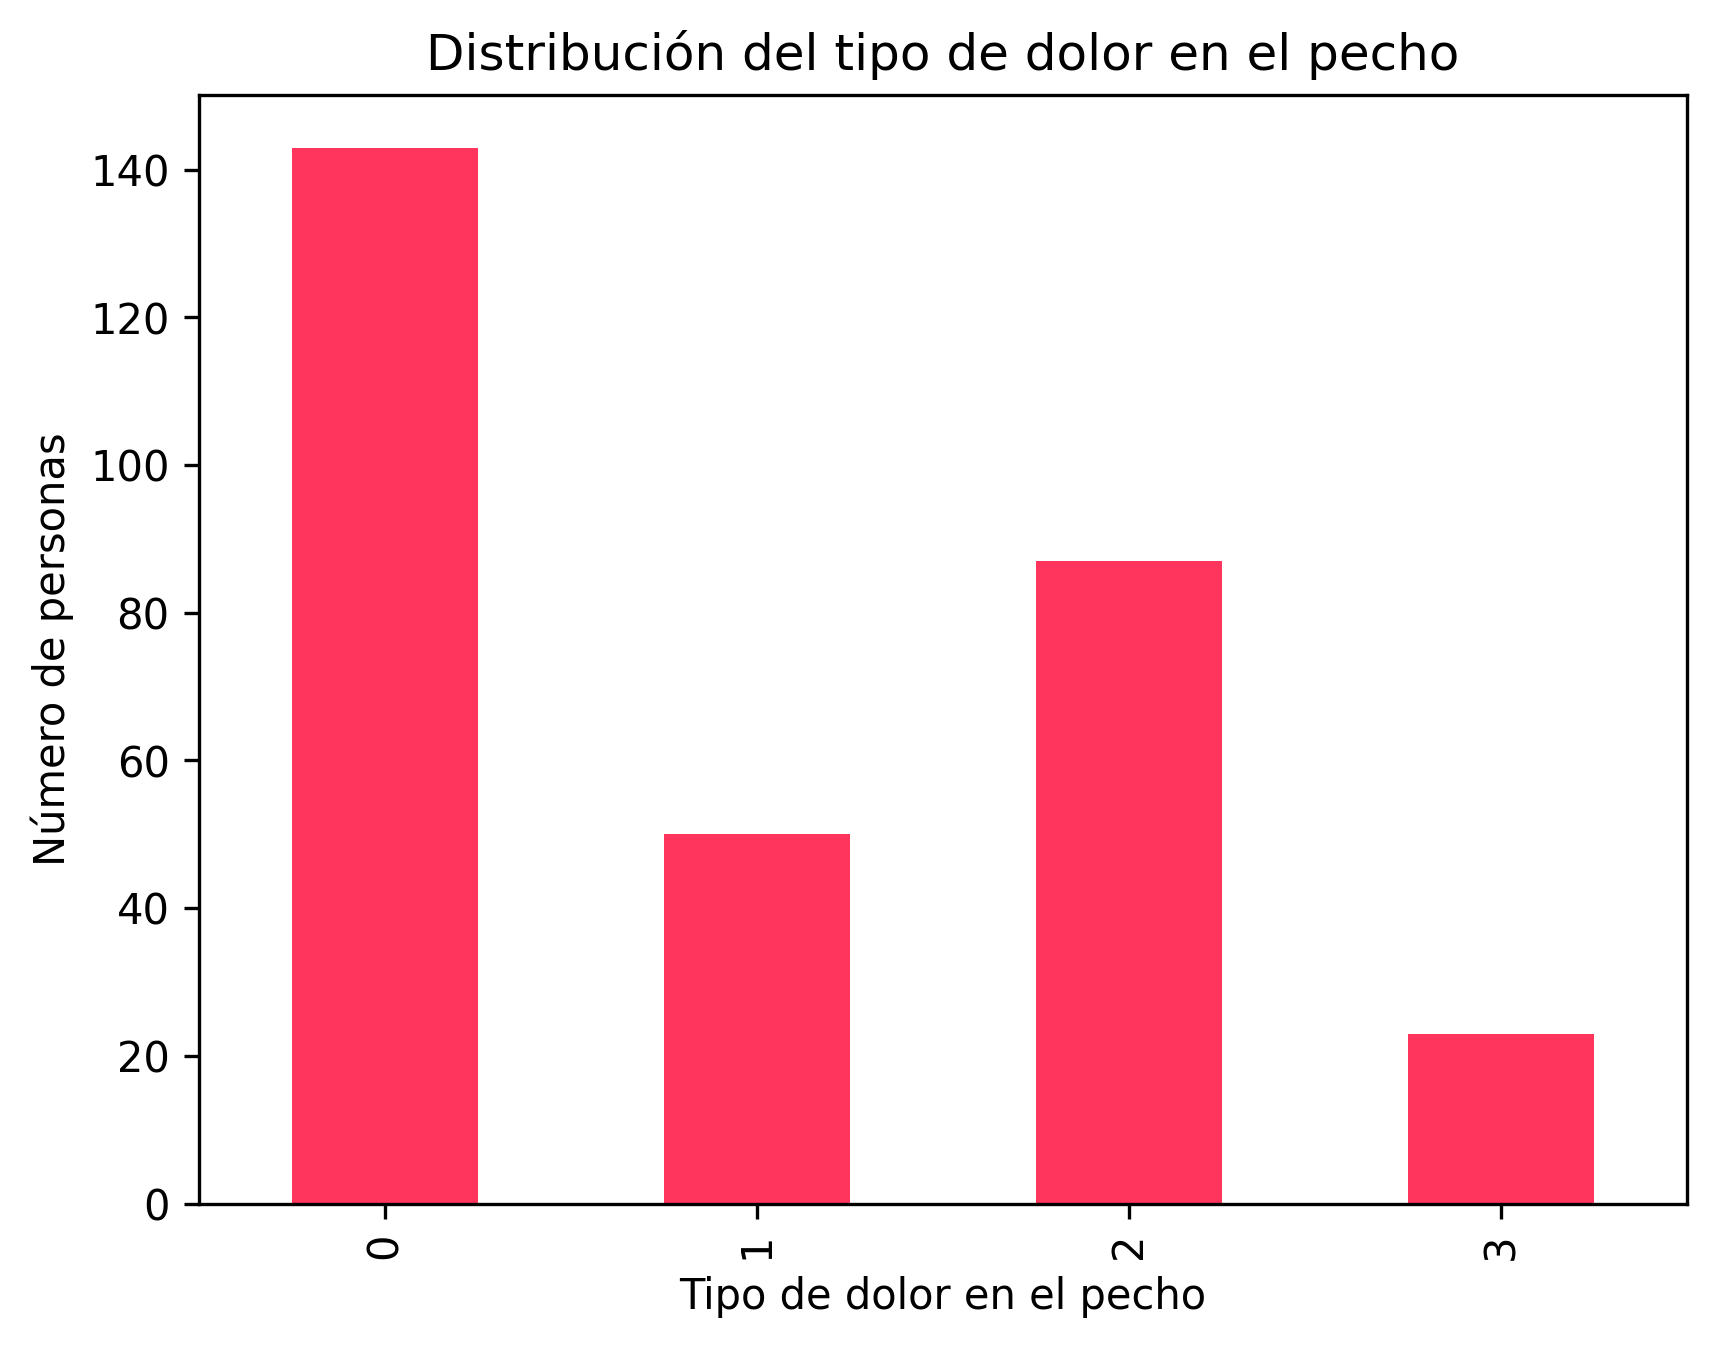

In [ ]:
df_sorted = df['cp'].value_counts().sort_index()
df_sorted.plot(kind='bar')
plt.xlabel('Tipo de dolor en el pecho')
plt.ylabel('Número de personas')
plt.title('Distribución del tipo de dolor en el pecho')
plt.show()

**Observación:**

* Los (0)asintomaticos son los de mayor frecuencia seguidos por (2)angina atípica siendo los de menor fercuencia (3)dolor no anginoso

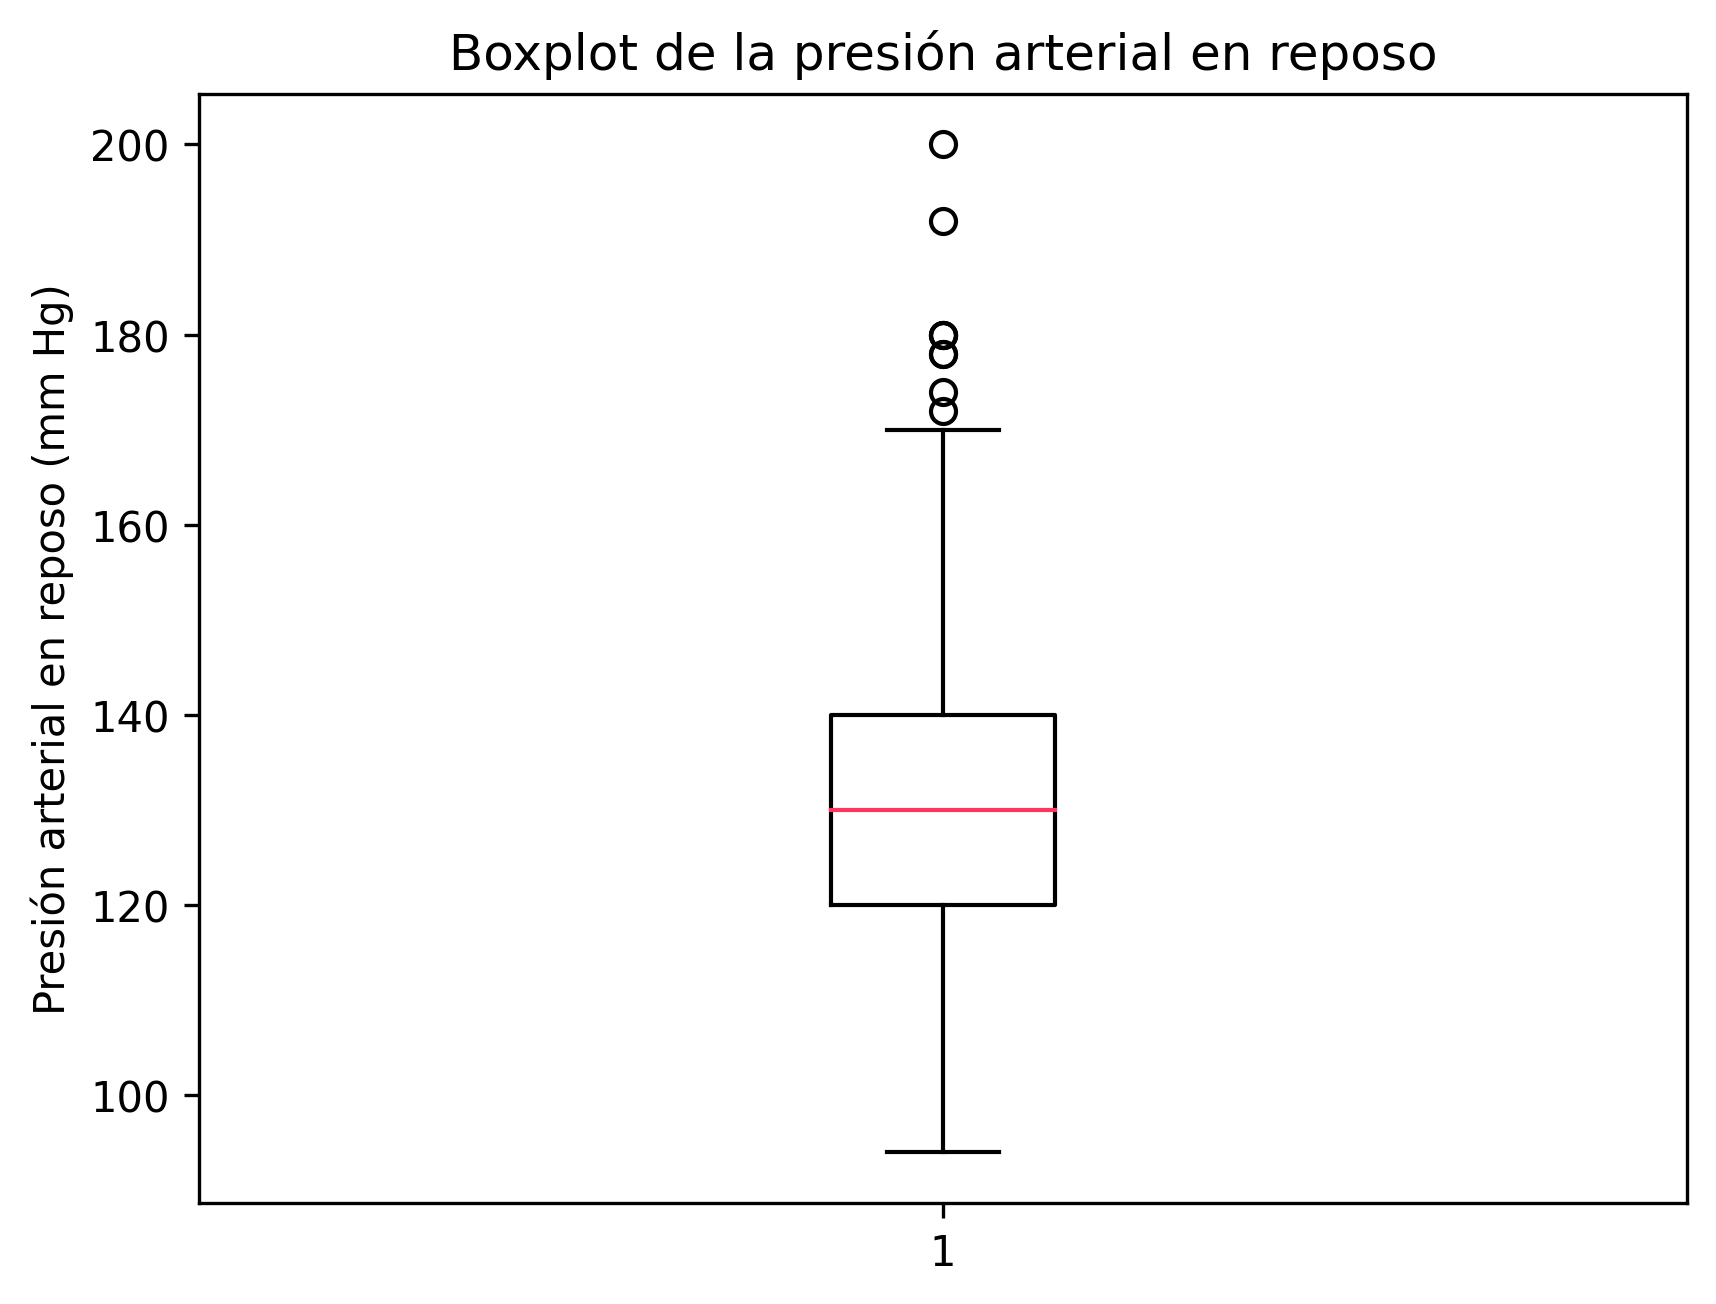

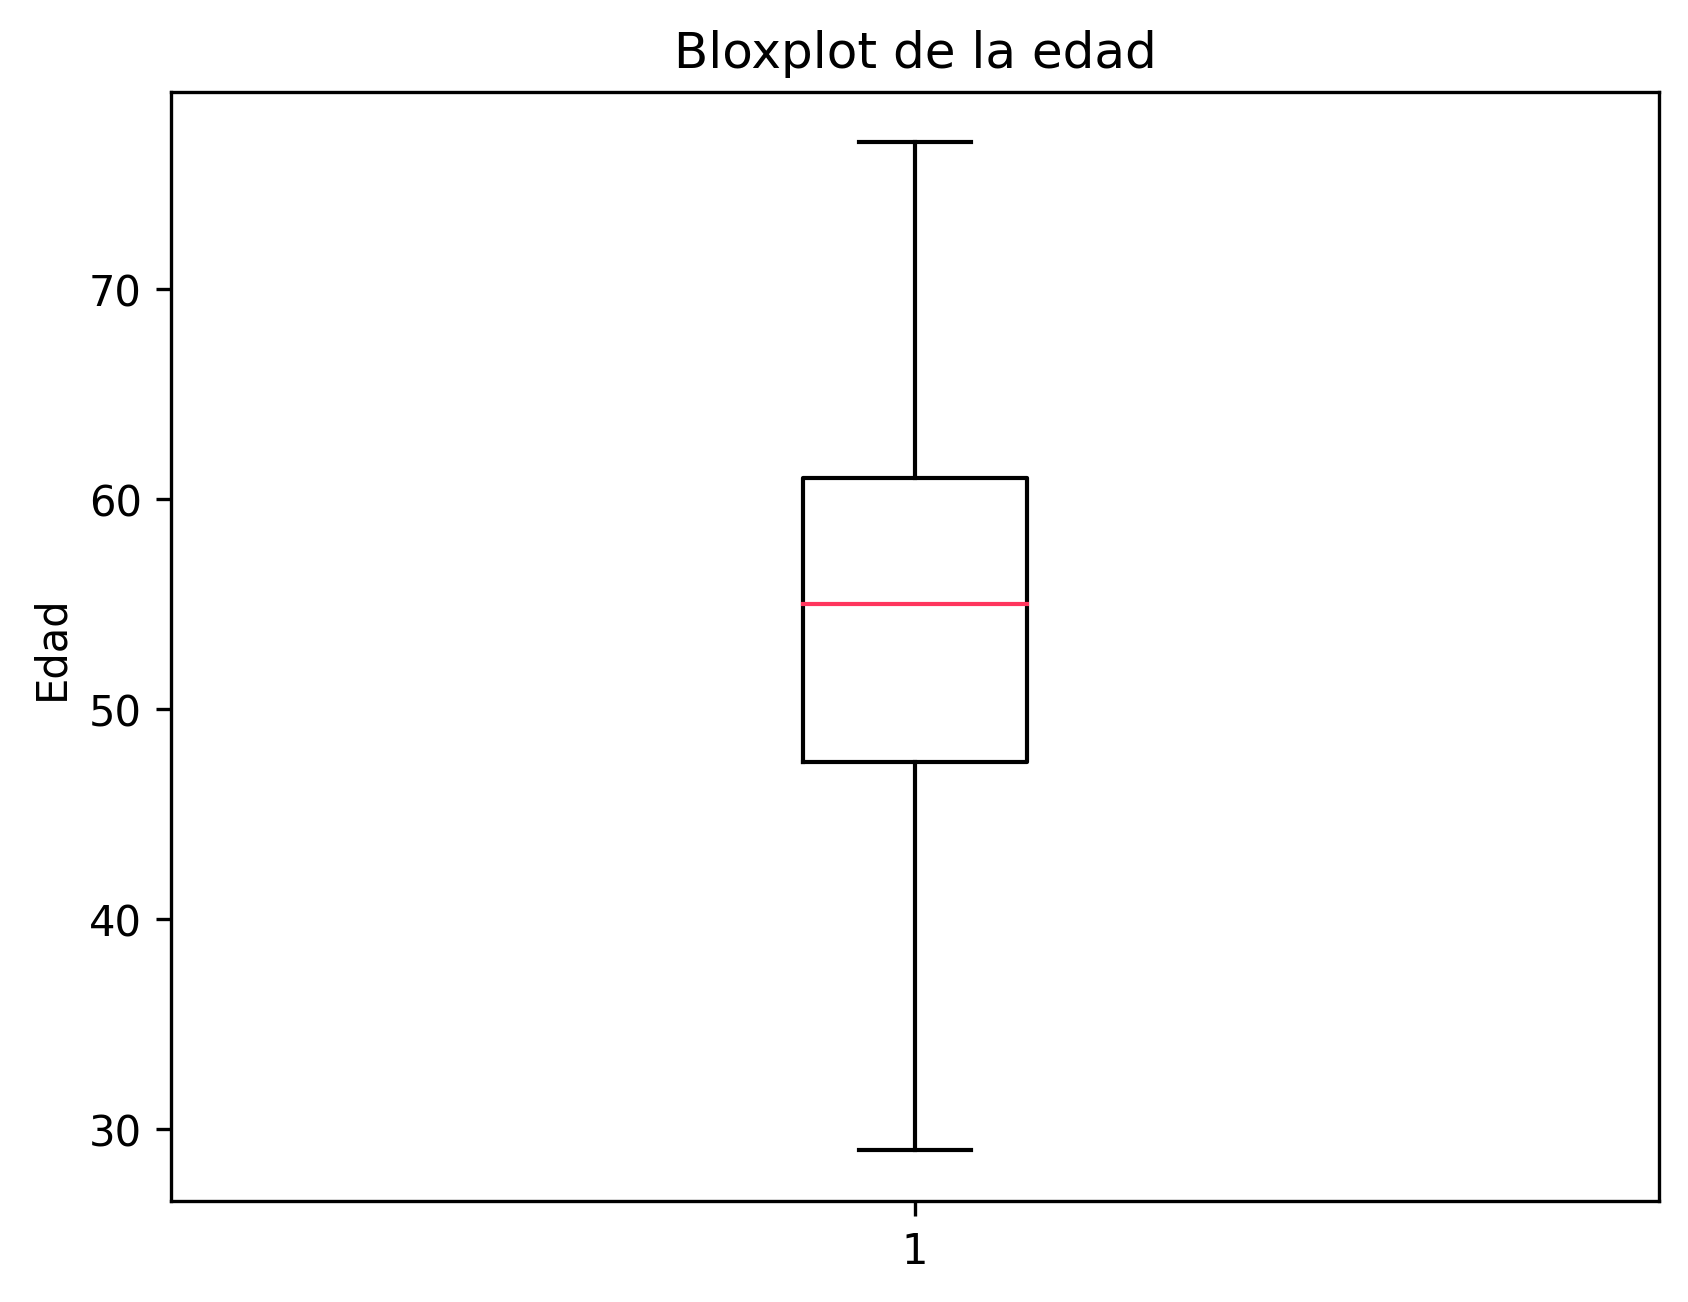

In [ ]:
# Diagrama boxplot de la presión arterial en reposo
plt.boxplot(df['trtbps'])
plt.ylabel('Presión arterial en reposo (mm Hg)')
plt.title('Boxplot de la presión arterial en reposo')
plt.show()
plt.boxplot(df['age'])
plt.ylabel('Edad')
plt.title('Bloxplot de la edad')
plt.show()

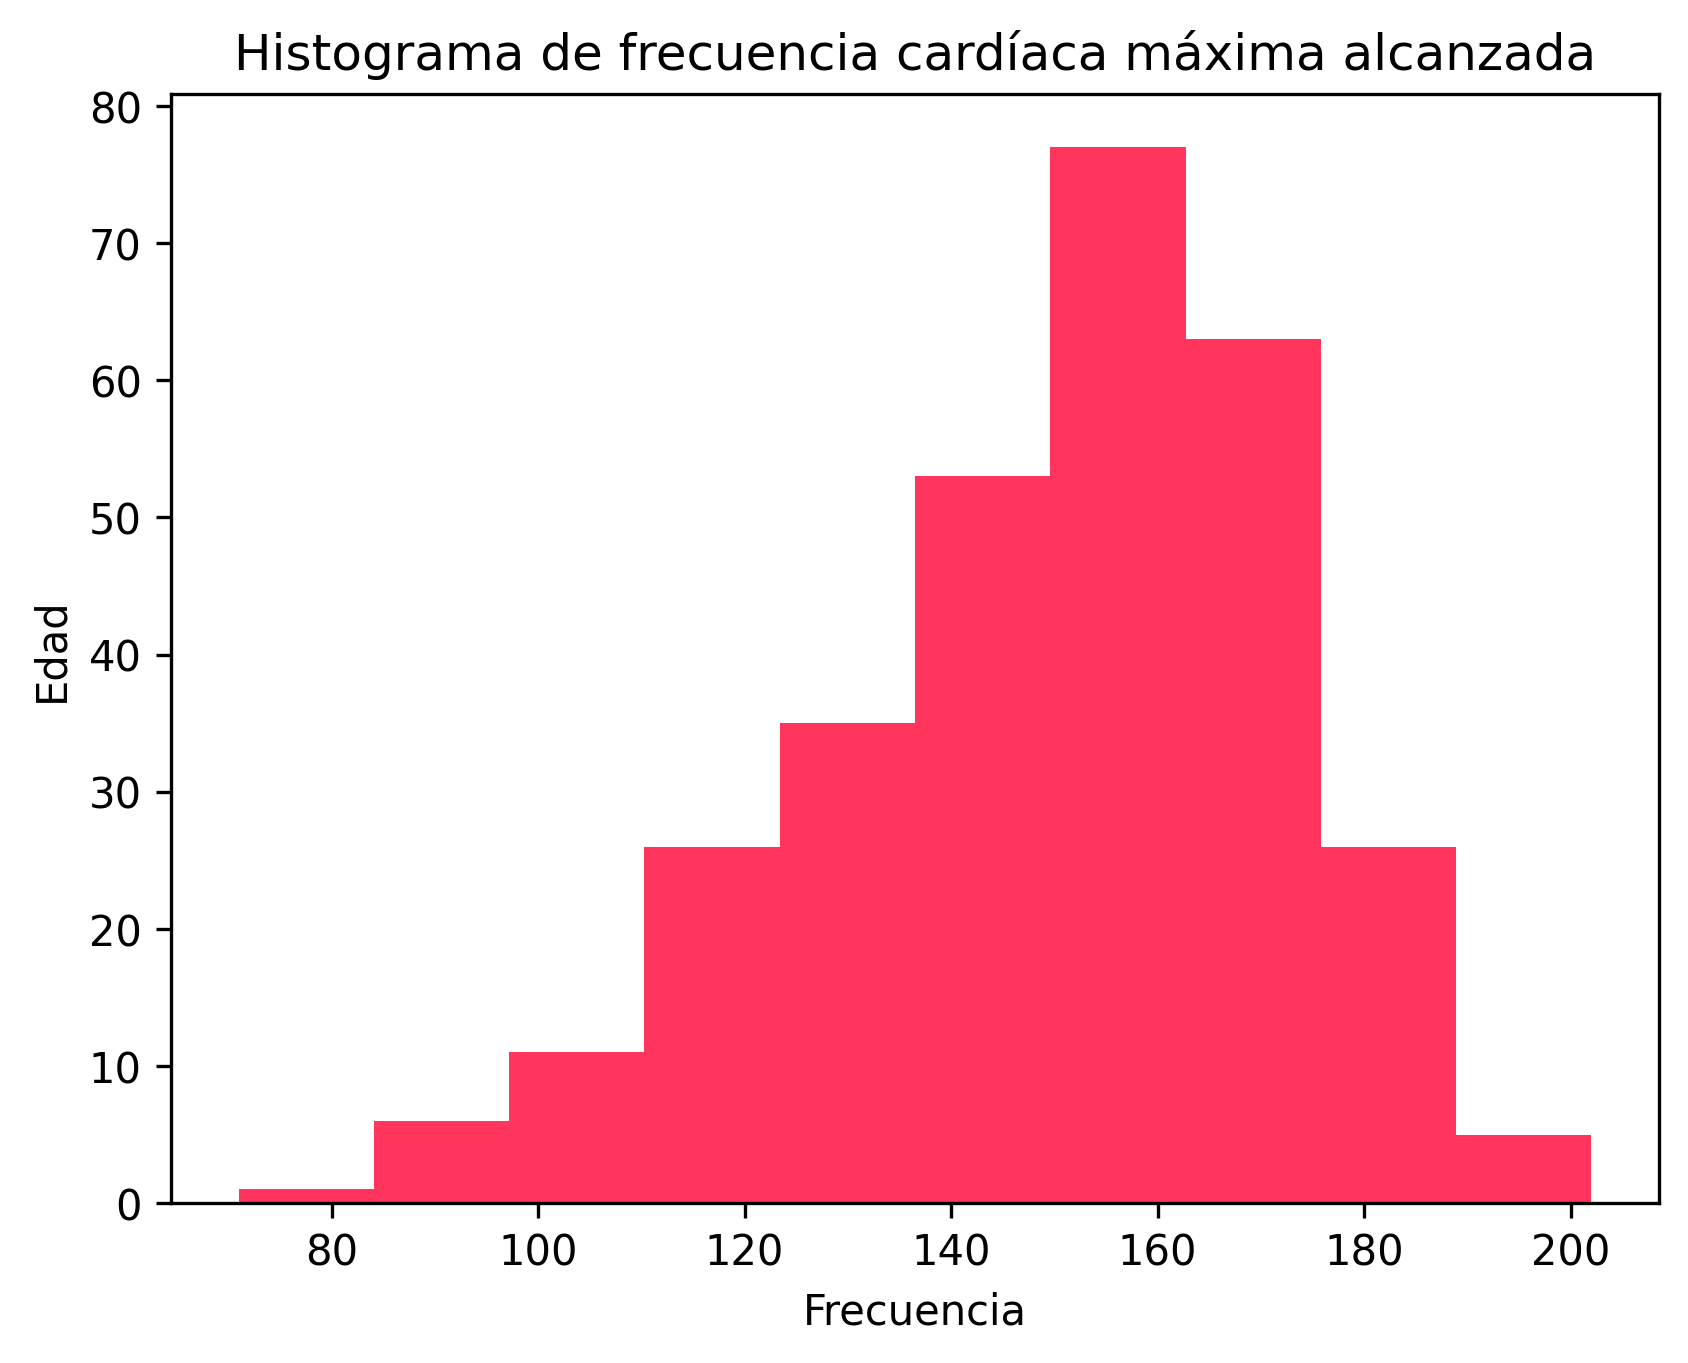

In [ ]:
# Histograma de la edad
plt.hist(df['thalachh'], bins=10)
plt.xlabel('Frecuencia')
plt.ylabel('Edad')
plt.title('Histograma de frecuencia cardíaca máxima alcanzada')
plt.show()

**Observación:**

En este histograma podemos observar que la mayor frecuencia de "Frecuencia cardíaca máxima" se encuentra en el rango de 150 a 165.

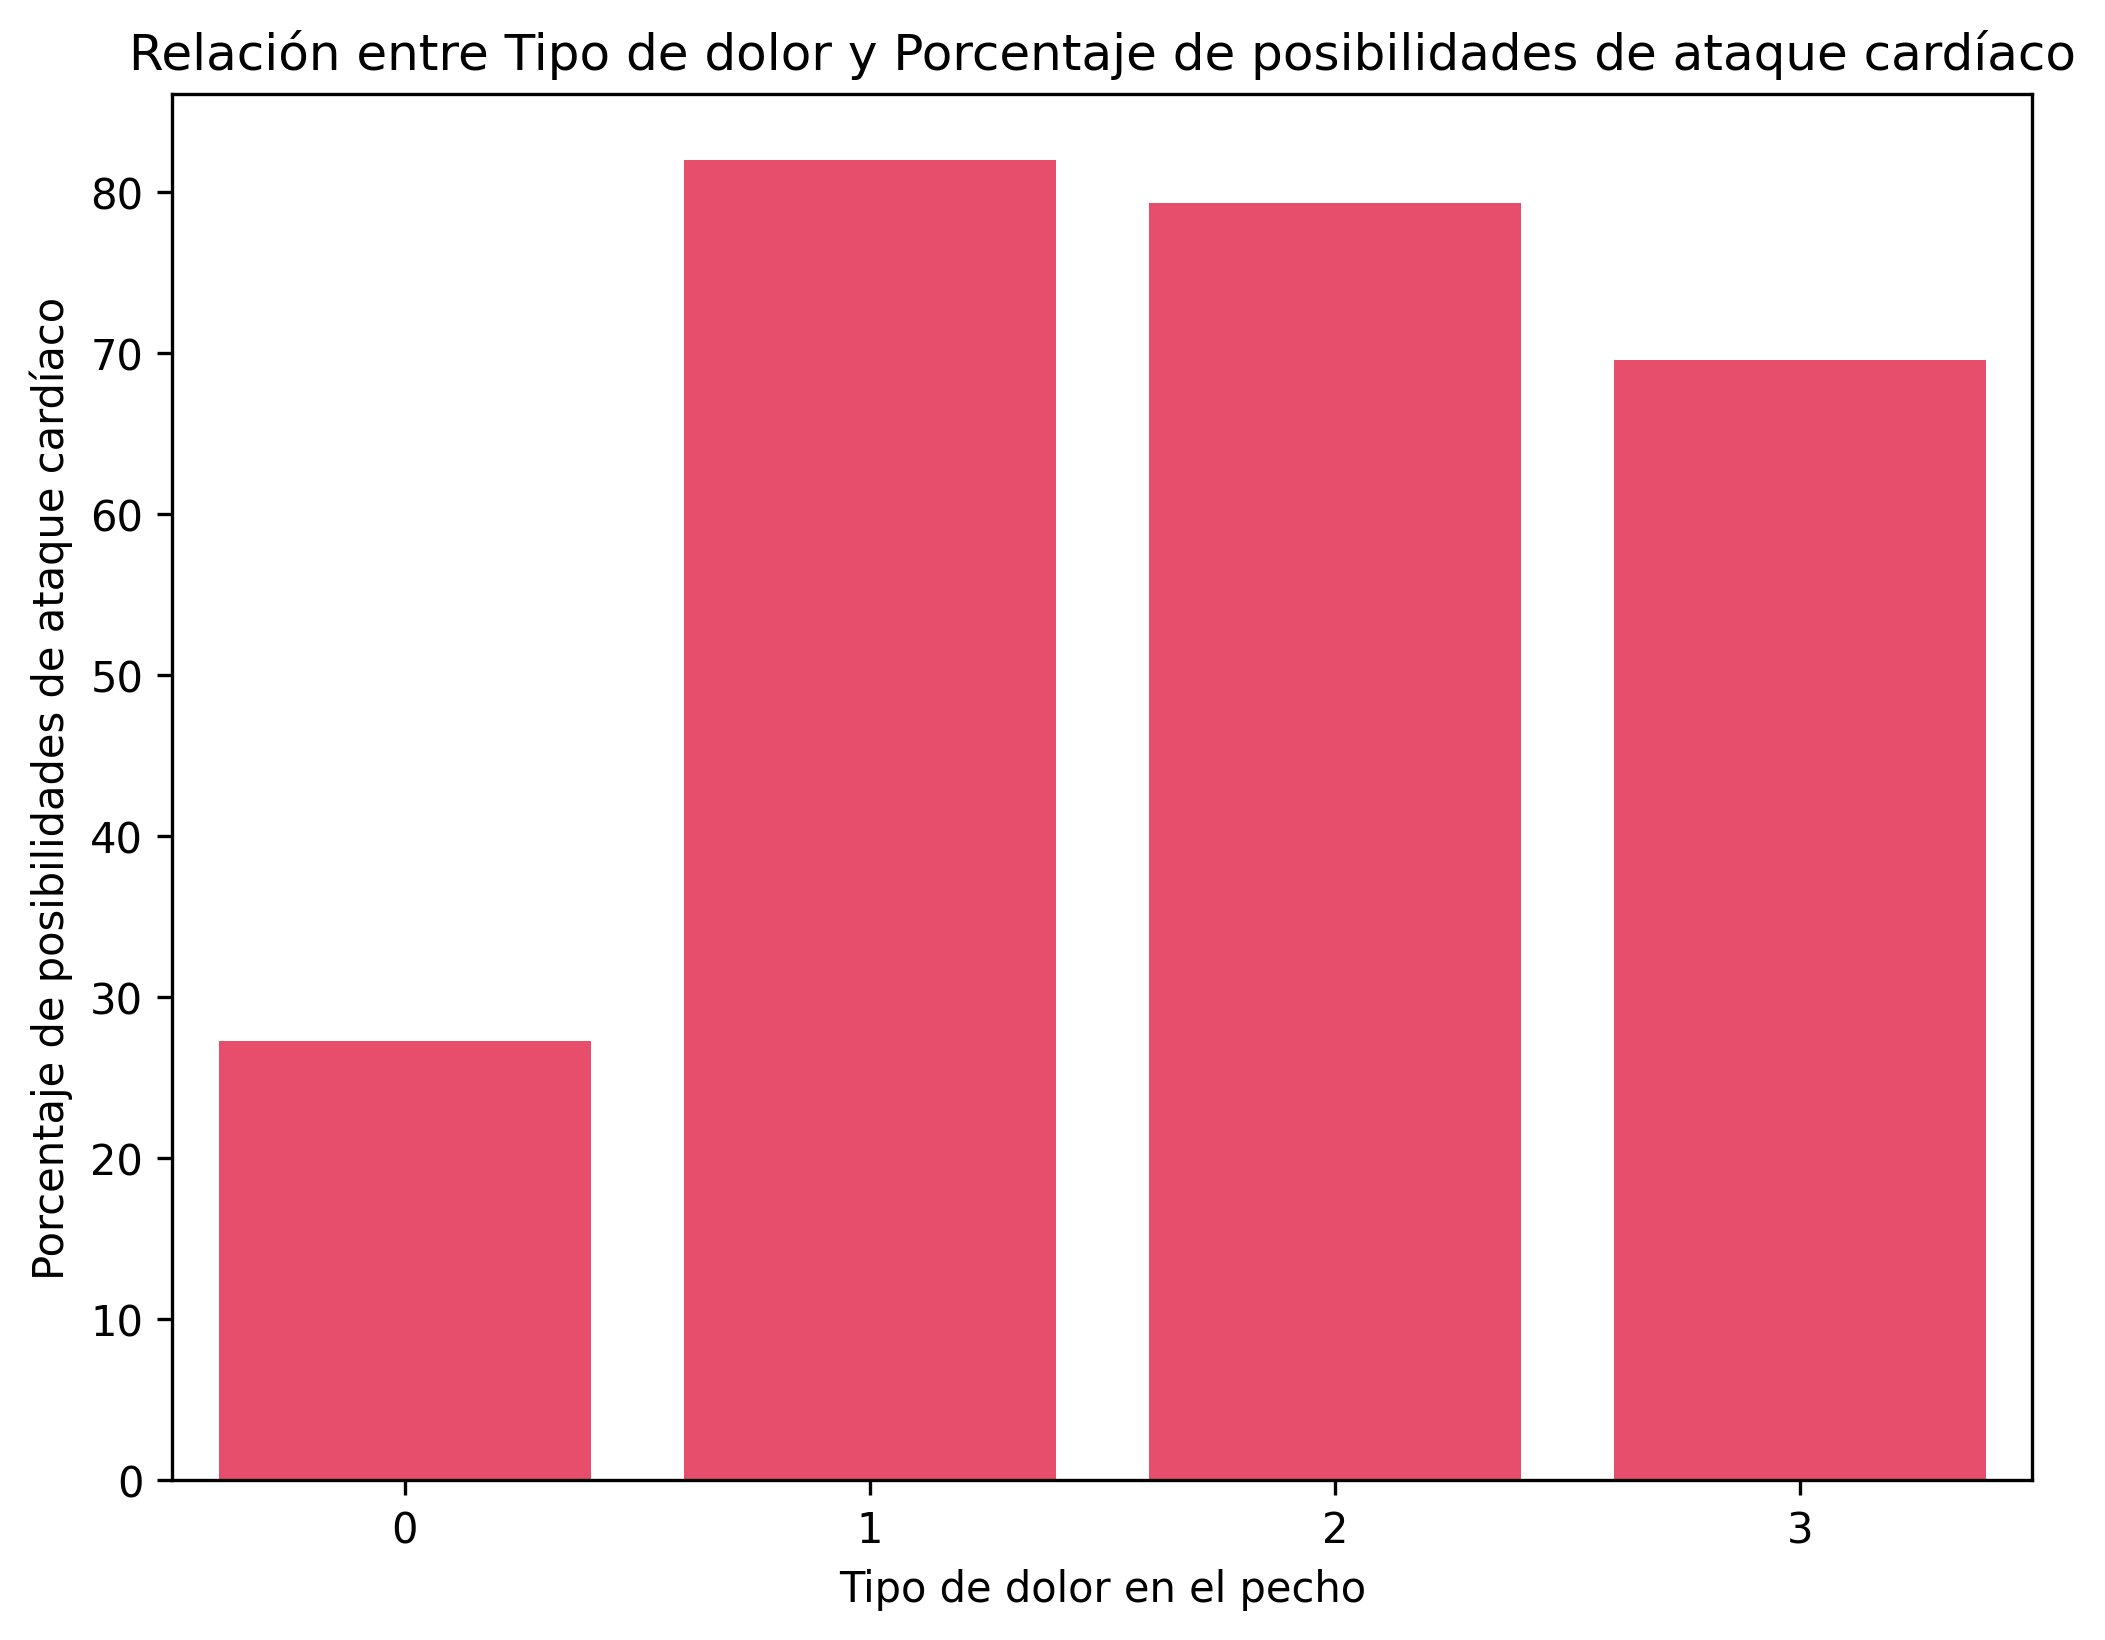

In [ ]:
# Agrupar los datos por tipo de dolor y calcular el porcentaje de posibilidades de tener un ataque cardíaco
porcentajeataque = df.groupby('cp')['output'].mean().reset_index()

# Multiplicar los valores de 'output' por 100
porcentajeataque['output'] = porcentajeataque['output']*100

# Graficar el porcentaje de posibilidades de ataque por tipo de dolor
plt.figure(figsize=(8, 6))
sns.barplot(data=porcentajeataque, x='cp', y='output')
plt.xlabel('Tipo de dolor en el pecho')
plt.ylabel('Porcentaje de posibilidades de ataque cardíaco')
plt.title('Relación entre Tipo de dolor y Porcentaje de posibilidades de ataque cardíaco')

plt.show()

In [ ]:
# Seleccionar las variables para el análisis de PCA
variables = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs',
             'restecg', 'thalachh', 'exng', 'oldpeak',
             'slp', 'caa', 'thall']

# Extraer las variables seleccionadas del DataFrame
subset_data = df[variables]

# Realizar la estandarización de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(subset_data)

# Crear una instancia de PCA con el número de componentes deseados
pca = PCA(n_components=2)

# Ajustar y transformar los datos al espacio de las componentes principales
componentes_principales = pca.fit_transform(scaled_data)

# Obtener la varianza explicada por cada componente principal
varianza_explicada = pca.explained_variance_ratio_

# Imprimir los resultados
print("Componentes principales:")
print(componentes_principales)
print("Varianza explicada:")
print(varianza_explicada)

Componentes principales:
[[ 6.24110729e-01  2.32127028e+00]
 [-4.55987975e-01 -9.57350982e-01]
 [-1.82880491e+00  4.28847737e-02]
 [-1.71600605e+00 -4.95337323e-01]
 [-3.71356421e-01  3.01156175e-01]
 [-6.48867460e-01 -3.82882350e-01]
 [-7.26534041e-02  1.46021954e+00]
 [-1.90592574e+00 -1.15199470e+00]
 [-9.05732769e-01  1.17802505e+00]
 [-1.42452084e+00  6.00440468e-02]
 [-8.29249247e-01 -4.31111662e-01]
 [-1.76837052e+00  6.66082010e-01]
 [-1.73039364e+00 -3.62122452e-01]
 [ 4.78579542e-01 -3.66100880e-01]
 [-1.13904999e+00  3.31505033e+00]
 [-1.15305728e+00  3.38842792e-02]
 [-2.05289635e+00  1.44304375e+00]
 [ 1.24660567e+00  1.56563220e+00]
 [-1.17898795e+00 -5.93288357e-01]
 [-3.87798996e-01  2.04509682e+00]
 [-1.09484581e-02 -7.39533549e-01]
 [-1.69288377e+00 -1.05478211e+00]
 [-2.03684479e+00 -9.44816640e-01]
 [ 9.35559575e-01  9.21609753e-01]
 [-1.32664177e+00 -1.31154957e+00]
 [-1.39644919e-01  2.60255695e+00]
 [-7.38694870e-01  1.29433620e+00]
 [-1.46985273e+00 -1.28905546e

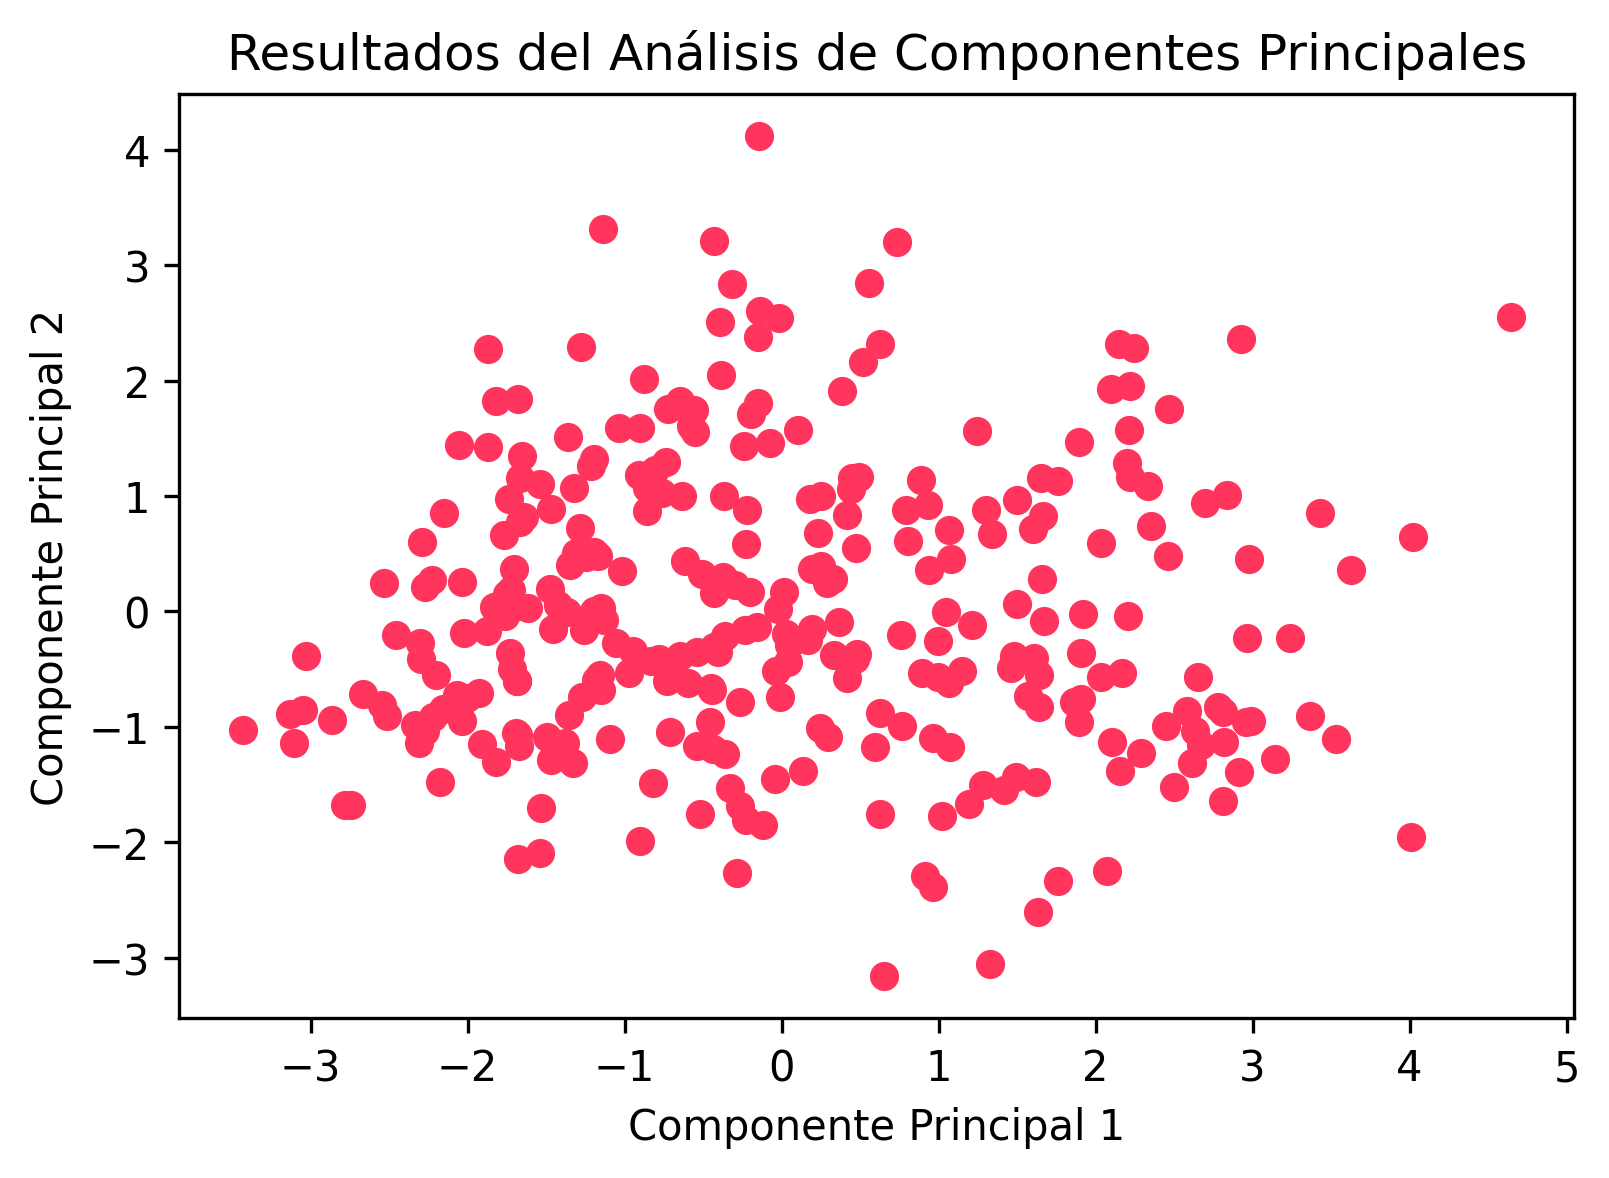

In [ ]:
# Graficar los componentes principales
plt.figure(figsize=(6, 4))
plt.scatter(componentes_principales[:, 0], componentes_principales[:, 1])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Resultados del Análisis de Componentes Principales')
plt.show()

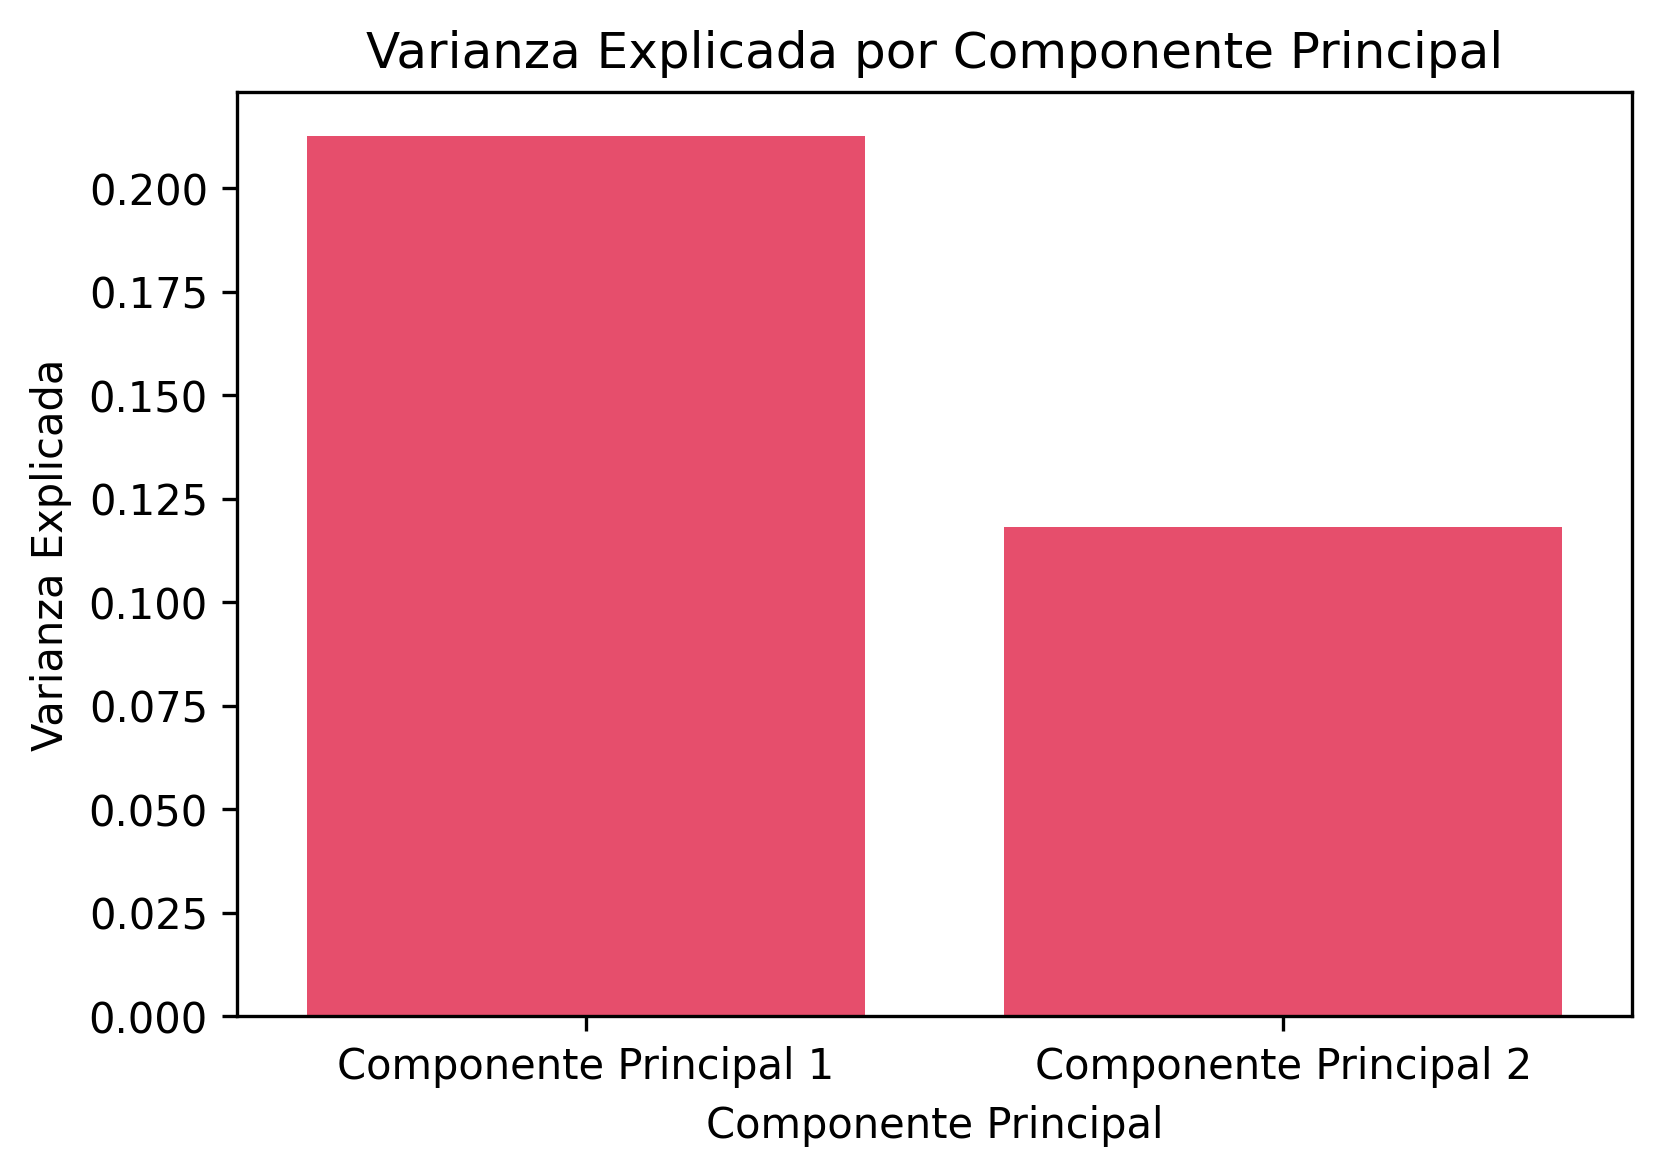

In [ ]:
# Graficar la varianza explicada
plt.figure(figsize=(6, 4))
sns.barplot(x=['Componente Principal 1', 'Componente Principal 2'], y=varianza_explicada)
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal')
plt.show()

**Conclusión general:**

* Variables numéricas - ¡No se encontraron valores atípicos!

* La presión arterial alta, el colesterol alto y la frecuencia cardíaca alta conducen a una alta probabilidad de ataque cardíaco.

* La edad de 40 a 60 años tiene una alta probabilidad de ataque al corazón.

* El género masculino tiene más posibilidades de infarto en comparación con las mujeres.

* Los factores altamente correlacionados en este conjunto de datos son:

 * Edad y trtbps (tasa de presión arterial)
 * Edad y chol (nivel de colesterol)

# **APRENDIZAJE SUPERVISADO**